In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
N0 = 100
T = 200
day: np.ndarray[np.float64] = np.arange(T + 1)
S: np.ndarray[np.float64] = np.zeros(T + 1)
I: np.ndarray[np.float64] = np.zeros(T + 1)
R: np.ndarray[np.float64] = np.zeros(T + 1)
CI: np.ndarray[np.float64] = np.zeros(T + 1)

I[0] = 1
S[0] = N0 - I[0]
R[0] = 0
CI[0] = 1

gamma = 1 / 14
R0: np.ndarray[np.float64] = np.arange(0.2, 3, 0.01)
betas: np.ndarray[np.float64] = R0 * gamma
dt = 1
eta = 0.01


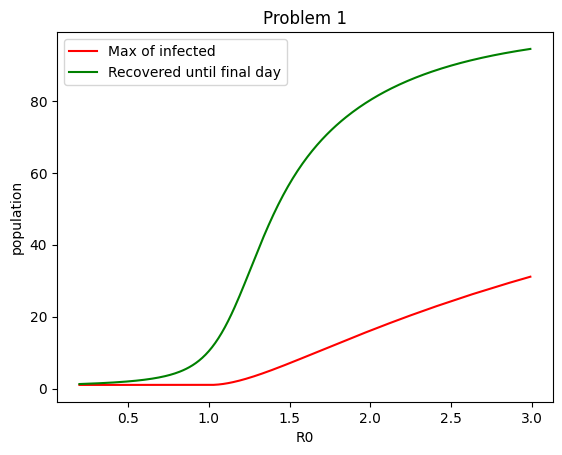

In [4]:
M: np.ndarray[np.float64] = np.zeros_like(betas)
RT: np.ndarray[np.float64] = np.zeros_like(betas)
for i, b in enumerate(betas):
    for d in range(1, T + 1):
        S[d] = S[d - 1] + dt * (-b * I[d - 1] * S[d - 1] / N0)
        I[d] = I[d - 1] + dt * \
            (b * I[d - 1] * S[d - 1] / N0 - gamma * I[d - 1])
        R[d] = N0 - S[d] - I[d]
    M[i] = max(I)
    RT[i] = R[T]
plt.plot(R0, M, 'r', label='Max of infected')
plt.plot(R0, RT, 'g', label='Recovered until final day')
plt.xlabel('R0')
plt.ylabel('population')
plt.title('Problem 1')
plt.legend()
plt.show()


4.666666666666667


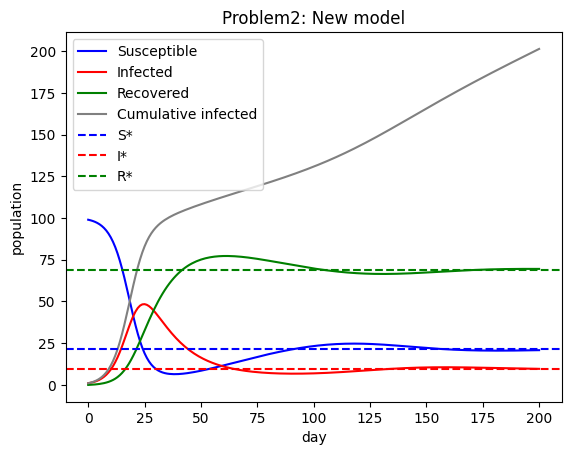

In [5]:
b = 1 / 3
print(b / gamma)
for d in range(1, T + 1):
    S[d] = S[d - 1] + dt * (-b * I[d - 1] * S[d - 1] / N0 + eta * R[d - 1])
    I[d] = I[d - 1] + dt * \
        (b * I[d - 1] * S[d - 1] / N0 - gamma * I[d - 1])
    R[d] = N0 - S[d] - I[d]
    newpatients = dt * b * I[d - 1] * S[d - 1] / N0
    CI[d] = CI[d - 1] + newpatients
plt.plot(day, S, 'b', label='Susceptible')
plt.plot(day, I, 'r', label='Infected')
plt.plot(day, R, 'g', label='Recovered')
plt.plot(day, CI, 'gray', label='Cumulative infected')
plt.axhline(gamma / b * N0, color='blue', linestyle='--', label='S*')
plt.axhline(eta / (gamma + eta) * (1 - gamma / b)
            * N0, color='red', linestyle='--', label='I*')
plt.axhline(gamma / (gamma + eta) * (1 - gamma / b)
            * N0, color='green', linestyle='--', label='R*')
plt.legend()
plt.xlabel('day')
plt.ylabel('population')
plt.title("Problem2: New model")
plt.show()


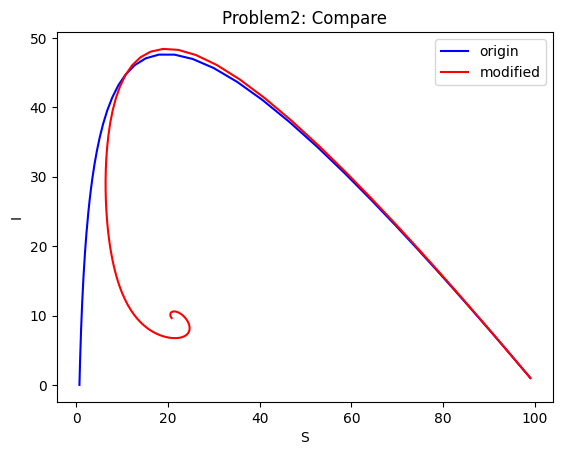

In [12]:
b = 1 / 3
for d in range(1, T + 1):
    S[d] = S[d - 1] + dt * (-b * I[d - 1] * S[d - 1] / N0)
    I[d] = I[d - 1] + dt * \
        (b * I[d - 1] * S[d - 1] / N0 - gamma * I[d - 1])
    R[d] = N0 - S[d] - I[d]
plt.plot(S, I, 'b', label='origin')

for d in range(1, T + 1):
    S[d] = S[d - 1] + dt * (-b * I[d - 1] * S[d - 1] / N0 + eta * R[d - 1])
    I[d] = I[d - 1] + dt * \
        (b * I[d - 1] * S[d - 1] / N0 - gamma * I[d - 1])
    R[d] = N0 - S[d] - I[d]
    newpatients = dt * b * I[d - 1] * S[d - 1] / N0
    CI[d] = CI[d - 1] + newpatients
plt.plot(S, I, 'r', label='modified')
plt.legend()
plt.xlabel('S')
plt.ylabel('I')
plt.title('Problem2: Compare')
plt.show()
